In [56]:
## Step 1: Import Packages

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

In [62]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, ElasticNet, Ridge

In [ ]:
## Step 2: Connect to Google Drive

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
## Step 3: Import Data

In [67]:
df = pd.read_csv('/content/gdrive/MyDrive/ECON441B/insurance.csv', parse_dates = True)
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [68]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]
X = pd.get_dummies(X,drop_first = True)
X.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,0,1,0,0,1
1,18,33.77,1,1,0,0,1,0


In [39]:
## Step 4: Split the Data 


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [71]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
156,48,24.420,0,1,1,0,1,0
123,44,31.350,1,1,1,0,0,0
1269,45,27.500,3,1,0,0,0,1
512,51,22.420,0,1,0,0,0,0
377,24,40.150,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
101,30,25.460,0,1,0,0,0,0
939,53,29.480,0,1,0,0,1,0
22,18,34.100,0,1,0,0,1,0
801,64,35.970,0,0,0,0,1,0


In [42]:
## Step 5: Normalize the Data

In [72]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [73]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [74]:
X_train

array([[-1.5053518 , -0.64391805, -0.91321348, ..., -0.5723141 ,
         1.65173333, -0.56943606],
       [-1.43443842, -1.70674034, -0.91321348, ..., -0.5723141 ,
        -0.60542461,  1.75612342],
       [-1.00895816,  0.44700373,  0.7614025 , ..., -0.5723141 ,
         1.65173333, -0.56943606],
       ...,
       [ 1.40209662,  1.07015148, -0.07590549, ..., -0.5723141 ,
        -0.60542461,  1.75612342],
       [-0.51256453,  0.52799641, -0.07590549, ...,  1.74729228,
        -0.60542461, -0.56943606],
       [ 0.19656923, -0.38275799,  1.59871048, ...,  1.74729228,
        -0.60542461, -0.56943606]])

In [ ]:
## Step 5: Get Lamba from LASSO Cross Validation

In [78]:
alphas = np.linspace(0, 1000, 100)
lasso = Lasso(max_iter = 1000)
coefs = []

In [79]:
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

<ipython-input-79-6aa36db0fb58>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.960e+10, tolerance: 1.583e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


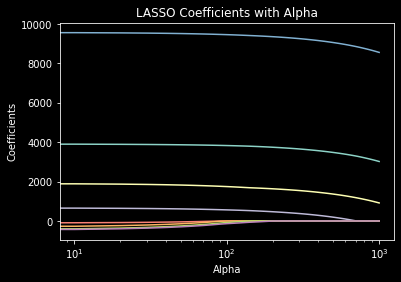

In [81]:
with plt.style.context('dark_background'):
  ax = plt.gca()
  ax.plot(alphas, coefs)
  ax.set_xscale('log')
  plt.axis('tight')
  plt.xlabel('Alpha')
  plt.ylabel("Coefficients")
  plt.title('LASSO Coefficients with Alpha')

In [85]:
lasso = Lasso().fit(X_train, y_train)
lasso_lambdas = {'alpha':np.linspace(100, 1000, 1000)}
lasso_best = GridSearchCV(lasso, lasso_lambdas, cv=10, scoring = 'neg_root_mean_squared_error').fit(X_train, y_train)
lasso_best.best_estimator_
round(abs(lasso_best.best_score_),)

6087

In [87]:
Lasso_RMSE = round(abs(lasso_best.best_score_),)
Lasso_RMSE/y_train.mean()

0.46246448531356815

In [ ]:
## Step 6: Run the Lambda Regression with LASSO

In [88]:
lasso = Lasso(alpha=154).fit(X_train, y_train)

In [ ]:
## Step 7: Visualize

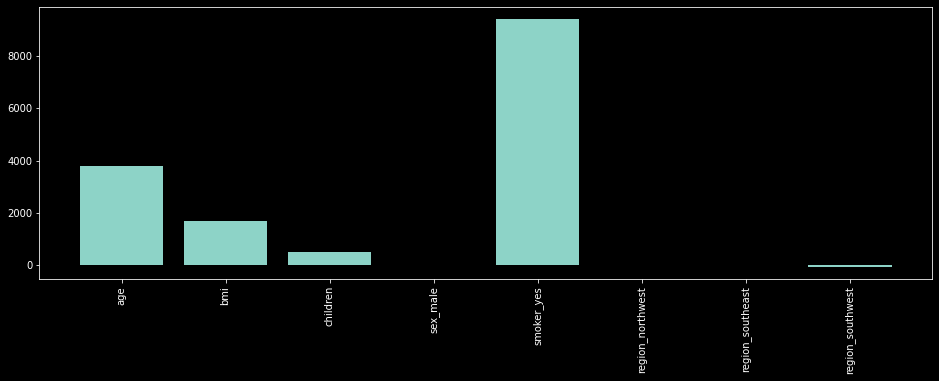

In [93]:
lasso_coef = lasso.coef_
with plt.style.context('dark_background'):  
  plt.figure(figsize = (16,5))
  plt.bar(X.columns.values.tolist(), lasso_coef.tolist())
  plt.xticks(rotation = 'vertical')
  plt.show()

In [ ]:
## Step 8: Interpret

In [94]:
lasso_coef

array([3784.90707965, 1675.68434304,  513.07681675,   -0.        ,
       9402.89275654,   -0.        ,   -0.        ,  -52.05374834])

In [95]:
## Analysis: The most relative importance indicators are 
## smokers, age, BMI and children

In [ ]:
## Step 9: Compare In and Out

In [96]:
fitted_values = lasso.predict(X_train)

In [104]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
lasso_in_sample_MSE = mean_squared_error(y_train, fitted_values)
print(f'LASSO RMSE {round(np.sqrt(lasso_in_sample_MSE))}')

LASSO RMSE 6073


In [106]:
prediction = lasso.predict(X_test)
lasso_MSE = mean_squared_error(y_test, prediction)
print(f'LASSO RMSE {round(np.sqrt(lasso_MSE))}')

LASSO RMSE 6084
